In [93]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
from scipy import stats

### Note - Python uses the equation $ \sigma_f^2 = \sigma_x^2 \Big( \frac{\partial f}{\partial x} \Big) + \sigma_y^2 \Big( \frac{\partial f}{\partial y} \Big) + \sigma_z^2 \Big( \frac{\partial f}{\partial z} \Big) + ...$ in the uncertainties package to propagate the uncertainty 
### u.float(x,y) is the uncertainties package method to include nominal value, x, and std_devs, y, into one number so that it may calculate uncertainty propagations using the above equation. 

In [110]:
#Characteristics found from table 1 in the write-up
InAs_thickness = ufloat(1.26 * 10**-4,0.02 * 10**-4) #(m)
InAs_width = ufloat(0.692, 0.004) #(mm)
InAs_length = ufloat(1.542, 0.005) #(mm)
InAs_resistance = ufloat(1.3, 0.3) #(ohms)

Al_thickness = ufloat(2.34 * 10**-7, 0.17 * 10**-7) #(m)
Al_width = ufloat(12.7, 0.05) #(mm)
Al_length = ufloat(30.5, 0.05) #(mm)
Al_resistance = ufloat(0.872, 0.018) #(ohms)

Au_thickness = ufloat(1.37 * 10**-7, 0.16 * 10**-7)  #(m)
Au_width = ufloat(12.7, 0.05)  #(mm)
Au_length = ufloat(30.5, 0.05)  #(mm)
Au_resistance = ufloat(0.770, 0.006)  #(ohms)


# Indium Arsenide 

For InAs: 
HallVoltage = [ 0.12375  1.7545   3.5077   5.2613   7.0139   8.7629  10.5126  12.2593
 14.00165]+/-[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001] mV


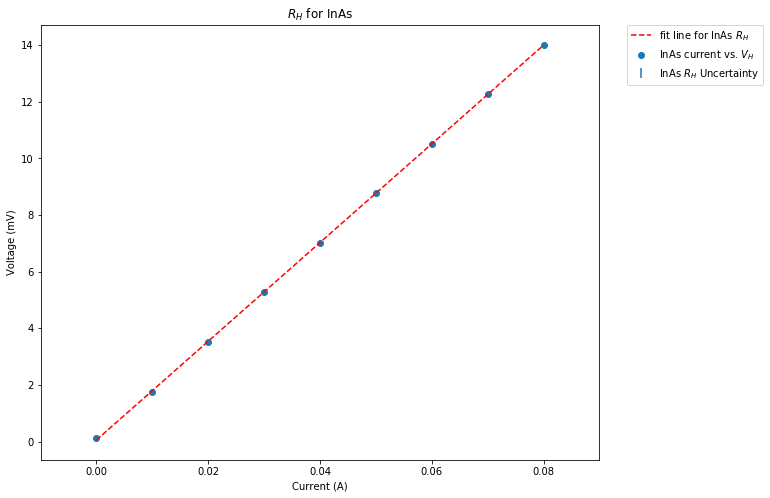

Uncertainties are too small to be visible
The Slope of this fit line is 174.2551+/-0.4433


In [95]:
B_z = ufloat(131.73 * 10**-6, 0.02 * 10**-6) #(Tesla)
InAs_current = [0,0.01,0.02,0.02999,0.04,0.04999,0.05999,0.06999,0.07999] #(A)
current_uncertainty = 0.00001 #(A) This applies to all samples
InAs_green_up_voltage = [-0.1235,-1.6185,-3.3616,-5.1025,-6.8444,-8.5794,-10.3178,-12.0503,-13.7812] #(mV)
InAs_green_down_voltage = [0.124,1.8905,3.6538,5.4201,7.1834,8.9464,10.7074,12.4683,14.2221] #(mV)
v_uncertainty = 0.0001 #(mV) This applies to all samples

InAs_up_v = []
for i in range(len(InAs_green_up_voltage)):
    x = ufloat(InAs_green_up_voltage[i], v_uncertainty)
    InAs_up_v.append(x)
InAs_down_v = []
for i in range(len(InAs_green_down_voltage)):
    x = ufloat(InAs_green_down_voltage[i], v_uncertainty)
    InAs_down_v.append(x)
InAs_current_unc = []
for i in range(len(InAs_green_up_voltage)):
    x = ufloat(InAs_current[i], current_uncertainty)
    InAs_current_unc.append(x)


InAs_hall_voltage = np.subtract(InAs_down_v, InAs_up_v)/2
print("For InAs: \nHallVoltage = " + str(unp.nominal_values(InAs_hall_voltage))+
      "+/-"+ str(np.round(unp.std_devs(InAs_hall_voltage),4)) + " mV")

plt.figure(figsize = (10,8))
#current vs HallVoltage for InAs
plt.scatter(InAs_current, unp.nominal_values(InAs_hall_voltage), label = "InAs current vs. $V_H$")

#fitting to above
InAs_fit = np.polyfit(InAs_current, unp.nominal_values(InAs_hall_voltage), 1)
f = np.poly1d(InAs_fit)
plt.plot(InAs_current, f(InAs_current), '--r', label = 'fit line for InAs $R_H$')
InAs_m, InAs_b, r_value, p_value, InAs_std_err = stats.linregress(InAs_current, unp.nominal_values(InAs_hall_voltage))

#error bars for above
plt.errorbar(InAs_current, unp.nominal_values(InAs_hall_voltage),
             yerr= unp.std_devs(InAs_hall_voltage), marker = 'None', fmt = 'o', label = 'InAs $R_H$ Uncertainty')


plt.xlabel('Current (A)')
plt.ylabel('Voltage (mV)')
plt.title( "$R_H$ for InAs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print("Uncertainties are too small to be visible")
print("The Slope of this fit line is "+ str(np.round(InAs_m,4))+ "+/-" +str(np.round(InAs_std_err,4)))


### conductivity: $ \sigma = \frac{l}{Rwt}$
### "Hall mobility": $ \mu_H \equiv \frac{|v_x|}{|E_x|}$ 


### Hall coefficient from Eq(5) and Eq(6) in write-up: $ R_H = - \frac{tV_H}{I_x B_z}$
### from the above  $\frac{V_H}{I_x} = slope$

In [134]:
InAs_conductivity = InAs_length / (InAs_resistance * InAs_width * InAs_thickness)
print("conductivity for InAs = " +str(InAs_conductivity)+ " 1/(Ohm*m)")
InAs_Hall_coeff = -ufloat(InAs_m,InAs_std_err) * (InAs_thickness / B_z)*10**-3
print("The Hall Coefficient (R_H) for InAs = " +str(InAs_Hall_coeff)+ " (Ohm*m)/T")
InAs_mobility = InAs_conductivity * InAs_Hall_coeff
print("InAs mobility (mu) = " +str(InAs_mobility)+ " 1/T")

conductivity for InAs = (1.36+/-0.31)e+04 1/(Ohm*m)
The Hall Coefficient (R_H) for InAs = -0.1667+/-0.0027 (Ohm*m)/T
InAs mobility (mu) = (-2.3+/-0.5)e+03 1/T


# Aluminum

For Al: 
HallVoltage = [-5.00e-05  4.50e-04  5.00e-04  1.05e-03  1.10e-03  1.50e-03  1.70e-03
  2.30e-03]+/-[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001] mV


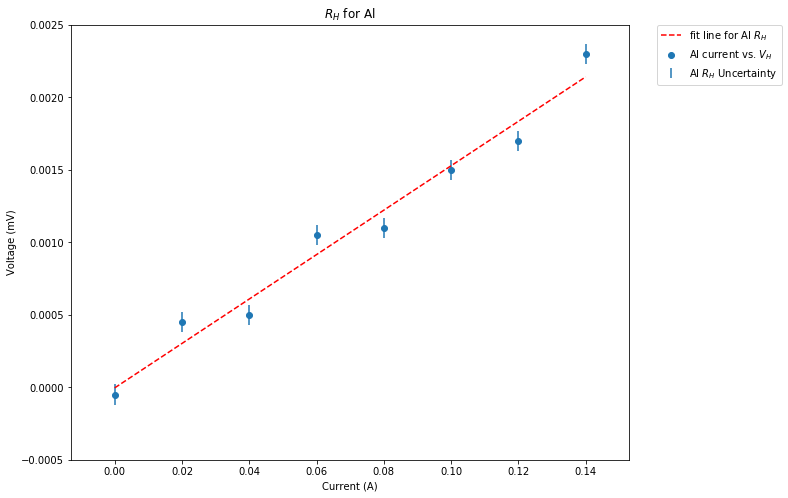

The Slope of this fit line is 0.0153+/-0.0011


In [139]:
Al_current = [0,0.02,0.03999,0.06,0.08001,0.1,0.11999,0.14002] #(A)
Al_green_up_voltage = [0.1221,0.1879,0.2542,0.32,0.3863,0.4522,0.5182,0.584] #(mV)
Al_green_down_voltage = [0.122,0.1888,0.2552,0.3221,0.3885,0.4552,0.5216,0.5886] #(mV)

Al_up_v = []
for i in range(len(Al_green_up_voltage)):
    x = ufloat(Al_green_up_voltage[i], v_uncertainty)
    Al_up_v.append(x)
Al_down_v = []
for i in range(len(Al_green_down_voltage)):
    x = ufloat(Al_green_down_voltage[i], v_uncertainty)
    Al_down_v.append(x)
Al_current_unc = []
for i in range(len(Al_green_up_voltage)):
    x = ufloat(Al_current[i], current_uncertainty)
    Al_current_unc.append(x)
    
Al_hall_voltage = np.subtract(Al_down_v, Al_up_v)/2
print("For Al: \nHallVoltage = " + str(unp.nominal_values(Al_hall_voltage)) +
      "+/-"+ str(np.round(unp.std_devs(Al_hall_voltage),4)) + " mV")

plt.figure(figsize = (10,8))

plt.scatter(Al_current, unp.nominal_values(Al_hall_voltage), label =  "Al current vs. $V_H$")

#fitting to above
Al_fit = np.polyfit(Al_current, unp.nominal_values(Al_hall_voltage), 1)
f = np.poly1d(Al_fit)
plt.plot(Al_current, f(Al_current), '--r', label = 'fit line for Al $R_H$')
Al_m, Al_b, r_value, p_value, Al_std_err = stats.linregress(Al_current, unp.nominal_values(Al_hall_voltage))

#error bars for above
plt.errorbar(Al_current, unp.nominal_values(Al_hall_voltage),
             yerr= unp.std_devs(Al_hall_voltage), marker = 'None', fmt = 'o', label = 'Al $R_H$ Uncertainty')

plt.xlabel('Current (A)')
plt.ylabel('Voltage (mV)')
plt.title( "$R_H$ for Al")

plt.ylim(-.0005,.0025)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print("The Slope of this fit line is "+ str(np.round(Al_m,4))+ "+/-" +str(np.round(Al_std_err,4)))

In [133]:
Al_conductivity = Al_length / (Al_resistance * Al_width * Al_thickness)
print("conductivity for Al = " +str(Al_conductivity)+ " 1/(Ohm*m)")
Al_Hall_coeff = -ufloat(Al_m,Al_std_err) * (Al_thickness / B_z)*10**-3
print("The Hall Coefficient (R_H) for Al = " +str(Al_Hall_coeff)+ " (Ohm*m)/T")
Al_mobility = Al_conductivity * Al_Hall_coeff
print("Al mobility (mu) = " +str(Al_mobility)+ " 1/T")

conductivity for Al = (1.18+/-0.09)e+07 1/(Ohm*m)
The Hall Coefficient (R_H) for Al = (-2.72+/-0.27)e-08 (Ohm*m)/T
Al mobility (mu) = -0.320+/-0.023 1/T


# Gold

For Au: 
HallVoltage = [-0.0001   0.00105  0.00225  0.003    0.00435  0.0055   0.0065   0.00775]+/-[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001] mV


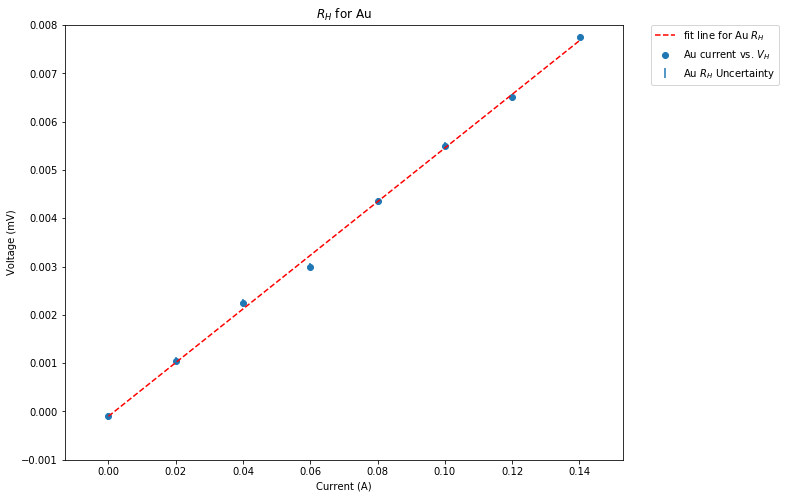

The Slope of this fit line is 0.0555+/-0.0009


In [137]:
Au_current = [0,0.02,0.04005,0.06,0.08003,0.10001,0.12005,0.14004] #(A)
current_uncertainty = 0.00001 #(A) This applies to all samples
Au_green_up_voltage = [0.1211,0.1024,0.0839,0.0654,0.0469,0.0282,0.0098,-0.009] #(mV)
Au_green_down_voltage = [0.1209,0.1045,0.0884,0.0714,0.0556,0.0392,0.0228,0.0065] #(mV)
v_uncertainty = 0.0001 #(mV) This applies to all samples

Au_up_v = []
for i in range(len(Au_green_up_voltage)):
    x = ufloat(Au_green_up_voltage[i], v_uncertainty)
    Au_up_v.append(x)
Au_down_v = []
for i in range(len(Au_green_down_voltage)):
    x = ufloat(Au_green_down_voltage[i], v_uncertainty)
    Au_down_v.append(x)
Au_current_unc = []
for i in range(len(Au_green_up_voltage)):
    x = ufloat(Au_current[i], current_uncertainty)
    Au_current_unc.append(x)


Au_hall_voltage = np.subtract(Au_down_v, Au_up_v)/2
print("For Au: \nHallVoltage = " + str(unp.nominal_values(Au_hall_voltage))+
      "+/-"+ str(np.round(unp.std_devs(Au_hall_voltage),4)) + " mV")

plt.figure(figsize = (10,8))
#current vs HallVoltage for Au
plt.scatter(Au_current, unp.nominal_values(Au_hall_voltage), label = "Au current vs. $V_H$")

#fitting to above
Au_fit = np.polyfit(Au_current, unp.nominal_values(Au_hall_voltage), 1)
f = np.poly1d(Au_fit)
plt.plot(Au_current, f(Au_current), '--r', label = 'fit line for Au $R_H$')
Au_m, b, r_value, p_value, Au_std_err = stats.linregress(Au_current, unp.nominal_values(Au_hall_voltage))

#error bars for above
plt.errorbar(Au_current, unp.nominal_values(Au_hall_voltage),
             yerr= unp.std_devs(Au_hall_voltage), marker = 'None', fmt = 'o', label = 'Au $R_H$ Uncertainty')


plt.xlabel('Current (A)')
plt.ylabel('Voltage (mV)')
plt.title( "$R_H$ for Au")
plt.ylim(-.001,.008)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
print("The Slope of this fit line is "+ str(np.round(Au_m,4))+ "+/-" +str(np.round(Au_std_err,4)))


In [138]:
Au_conductivity = (Au_length) / (Au_resistance * Au_width * Au_thickness)
print("conductivity for Au = " +str(Au_conductivity)+ " 1/(Ohm*m)")
Au_Hall_coeff = -ufloat(Au_m,Au_std_err) * (Au_thickness / B_z)*10**-3
print("The Hall Coefficient (R_H) for Au = " +str(Au_Hall_coeff)+ " (Ohm*m)/T")
Au_mobility = Au_conductivity * Au_Hall_coeff
print("Au mobility (mu) = " +str(Au_mobility)+ " 1/T")

conductivity for Au = (2.28+/-0.27)e+07 1/(Ohm*m)
The Hall Coefficient (R_H) for Au = (-5.8+/-0.7)e-08 (Ohm*m)/T
Au mobility (mu) = -1.315+/-0.024 1/T
